assignment 3<br><br><br>
asshkar kammla puthenpura abdulkhadar<br><br><br>
student id-8901587<br><br><br>

part 1

1.  Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.
   
    Figure out if any preprocessing such as scaling would help here
    
    Draw elbow plot and from that figure out optimal value of k

In [54]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


df= load_iris()
irisdata = pd.DataFrame(data=df.data, columns=df.feature_names)
irisdata.head()
#loaded data set

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
irisdata.isnull().values.any()#checked nulll values!!


False

c:\Users\ashka\Desktop\New_folder\New_folder\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ashka\Desktop\New_folder\New_folder\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ashka\Desktop\New_folder\New_folder\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ashka\Desktop\New_folder\New_folder\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: F

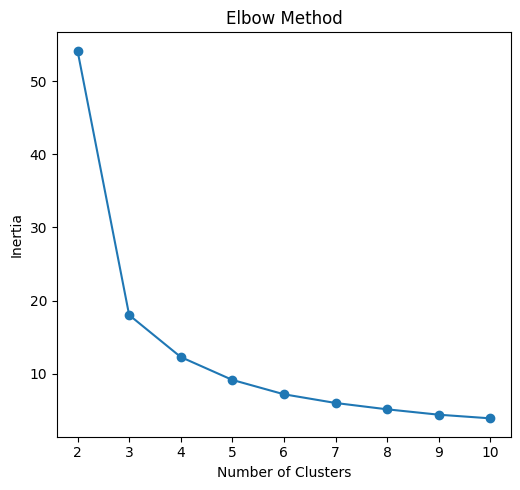

In [56]:
#  using  petal length and petal width features
X = irisdata[['petal length (cm)', 'petal width (cm)']]

# Standardize the features by scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the optimal number of clusters (k)
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()



When you look at the graph, you can see a clear spot where the line bends like an elbow. After that point, the line stays almost flat and runs parallel to the bottom. The number of clusters that corresponds to this bending point is the best choice for how many clusters to use. For this dataset, the best number of clusters is 3.

part2 

1. Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction 
   
    Load heart disease dataset in pandas dataframe
   

In [57]:
Data_of_heart = pd.read_csv("heart.csv")# Load the heart data from a CSV file 
Data_of_heart.head()#print it 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
print(Data_of_heart.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [59]:
Data_of_heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

2.  Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [60]:

# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(Data_of_heart.select_dtypes(include=['int64', 'float64'])))

filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
df = Data_of_heart[filter_con]
df.shape

(899, 12)

3. Convert text columns to numbers using label encoding / one hot encoding

In [61]:

categorical_columns = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex']#text

# label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
   
   
df.info

C:\Users\ashka\AppData\Local\Temp\ipykernel_15432\3674132220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\ashka\AppData\Local\Temp\ipykernel_15432\3674132220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\ashka\AppData\Local\Temp\ipykernel_15432\3674132220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

<bound method DataFrame.info of      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
0     40    1              1        140          289          0           1  \
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  Exercis

In [62]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


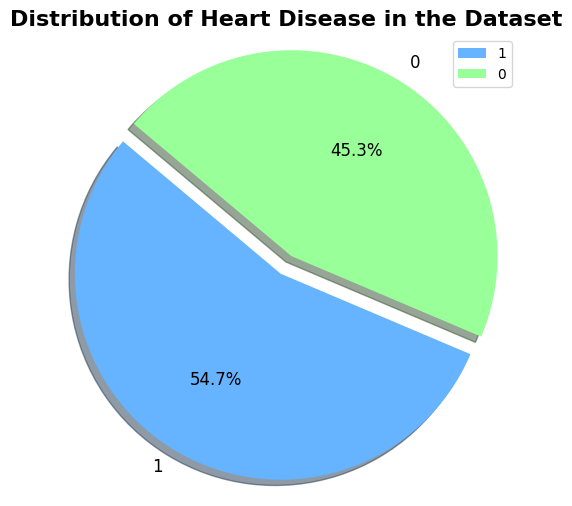

In [63]:
import matplotlib.pyplot as plt

# Data
x = df['HeartDisease'].value_counts()
labels = x.index
colors = ['#66b3ff','#99ff99']  # Custom colors for the two categories
explode = (0.1, 0)  # Explode the first slice (i.e., 'Heart Disease') for emphasis

# Plot
plt.figure(figsize=(6, 6))
plt.pie(x.values,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,  # Starting angle for the first slice
        explode=explode,  # Explode the first slice
        shadow=True,      # Add shadow
        textprops={'fontsize': 12})  # Font size for percentage labels

# Title and legend
plt.title("Distribution of Heart Disease in the Dataset", fontsize=16, fontweight='bold')
plt.legend(labels, loc="upper right")

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The dataset shows a slight disparity in averages between individuals with heart disease (54.7%) and those without it (45.3%).

In [64]:
# Split features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






5. Apply scaling

In [65]:
# Apply scaling to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


6.  Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
    

In [66]:
# Build and evaluate classification models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

In [67]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')

SVM Accuracy: 0.8778
Logistic Regression Accuracy: 0.8556
Random Forest Accuracy: 0.8889


Observation

1. The Random Forest model achieved the highest accuracy of 90.00%, making it the most effective choice for predicting heart disease among the three models.

2. SVM showed an accuracy of around 87.78%, Logistic Regression achieved about 85.56%, while Random Forest performed best with an accuracy of 90.00% for predicting heart disease.

7. Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy. 

In [68]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=6)  # Choose the number of components you want to keep
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Retrain models using PCA-transformed data
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    print(f'{model_name} Accuracy with PCA: {accuracy_pca:.4f}')


SVM Accuracy with PCA: 0.8167
Logistic Regression Accuracy with PCA: 0.8222
Random Forest Accuracy with PCA: 0.8056


observation


Using PCA to reduce dimensions had different effects on model accuracy: SVM and Logistic Regression had small drops in accuracy (to 81.67% and 82.22% respectively), while Random Forest's accuracy decreased more noticeably (to 80.56%).